# FLIGHT DELAY PREDICTION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
flights=pd.read_csv('flights1.csv',low_memory=True)

In [3]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
flights.shape

(1048575, 31)

In [5]:
airports=pd.read_csv('airports.csv')
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [6]:
airlines=pd.read_csv('airlines.csv')
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [7]:
airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [8]:
airports.dtypes

IATA_CODE     object
AIRPORT       object
CITY          object
STATE         object
COUNTRY       object
LATITUDE     float64
LONGITUDE    float64
dtype: object

In [9]:
# Fill missing values
airports['LATITUDE'].fillna(airports['LATITUDE'].mean(), inplace=True)
airports['LONGITUDE'].fillna(airports['LONGITUDE'].mean(), inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7256\2994913531.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airports['LATITUDE'].fillna(airports['LATITUDE'].mean(), inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7256\2994913531.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [10]:
airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [11]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1048575 non-null  int64  
 1   MONTH                1048575 non-null  int64  
 2   DAY                  1048575 non-null  int64  
 3   DAY_OF_WEEK          1048575 non-null  int64  
 4   AIRLINE              1048575 non-null  object 
 5   FLIGHT_NUMBER        1048575 non-null  int64  
 6   TAIL_NUMBER          1040825 non-null  object 
 7   ORIGIN_AIRPORT       1048575 non-null  object 
 8   DESTINATION_AIRPORT  1048575 non-null  object 
 9   SCHEDULED_DEPARTURE  1048575 non-null  int64  
 10  DEPARTURE_TIME       1009060 non-null  float64
 11  DEPARTURE_DELAY      1009060 non-null  float64
 12  TAXI_OUT             1008346 non-null  float64
 13  WHEELS_OFF           1008346 non-null  float64
 14  SCHEDULED_TIME       1048573 non-null  float64
 15

In [12]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

In [13]:
flights['AIRLINE'] = lc.fit_transform(flights['AIRLINE'])
flights['TAIL_NUMBER'] = lc.fit_transform(flights['TAIL_NUMBER'])
flights['ORIGIN_AIRPORT'] = lc.fit_transform(flights['ORIGIN_AIRPORT'])
flights['DESTINATION_AIRPORT'] = lc.fit_transform(flights['DESTINATION_AIRPORT'])
flights['CANCELLATION_REASON'] = lc.fit_transform(flights['CANCELLATION_REASON'])

In [14]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,1,98,1521,15,271,5,...,408.0,-22.0,0,0,4,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,0,2336,1470,171,229,10,...,741.0,-9.0,0,0,4,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,11,840,382,272,64,20,...,811.0,5.0,0,0,4,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,0,258,1430,171,198,20,...,756.0,-9.0,0,0,4,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,1,135,2015,271,15,25,...,259.0,-21.0,0,0,4,NaN,NaN,NaN,NaN,NaN


In [15]:
flights.isnull().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER                 0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          39515
DEPARTURE_DELAY         39515
TAXI_OUT                40229
WHEELS_OFF              40229
SCHEDULED_TIME              2
ELAPSED_TIME            43071
AIR_TIME                43071
DISTANCE                    0
WHEELS_ON               41296
TAXI_IN                 41296
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            41296
ARRIVAL_DELAY           43071
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON         0
AIR_SYSTEM_DELAY       820047
SECURITY_DELAY         820047
AIRLINE_DELAY          820047
LATE_AIRCRAFT_DELAY    820047
WEATHER_DELAY          820047
dtype: int64

In [16]:
import pandas as pd
columns_to_fill = ['DEPARTURE_TIME','DEPARTURE_DELAY', 'TAXI_OUT','WHEELS_OFF','ELAPSED_TIME','WHEELS_ON','TAXI_IN','AIR_TIME','ARRIVAL_TIME', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY',
                    'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY','SCHEDULED_TIME']
for column in columns_to_fill:
    flights[column].fillna(flights[column].mean(), inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7256\3648058413.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flights[column].fillna(flights[column].mean(), inplace=True)


In [17]:
flights.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

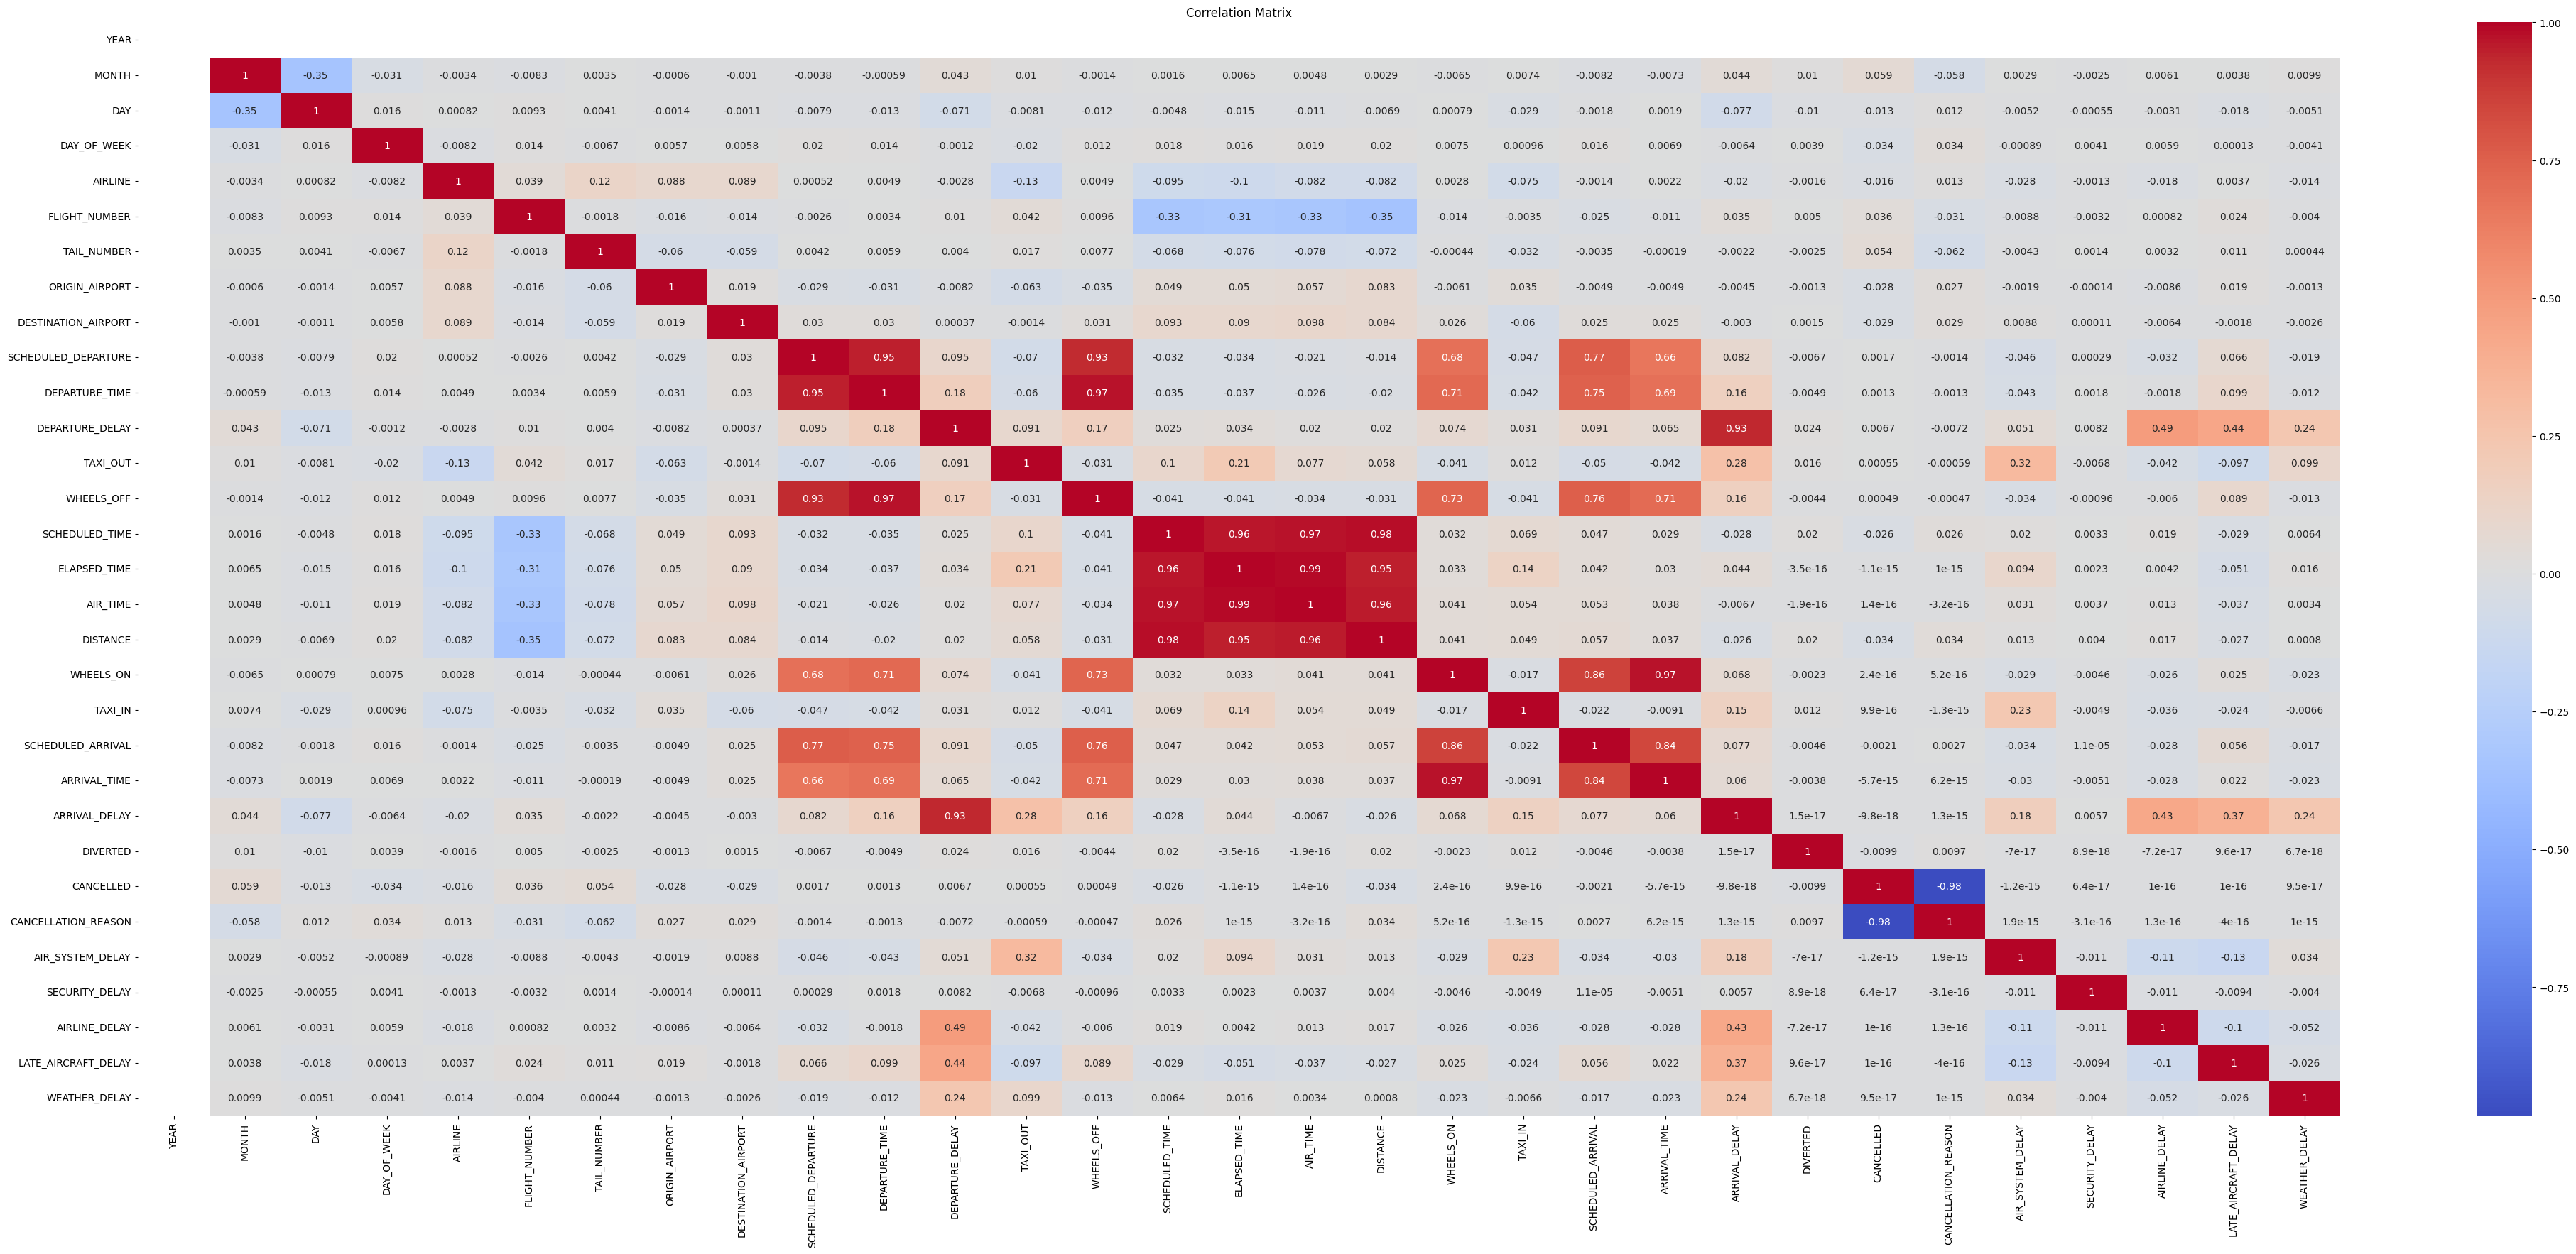

In [18]:
hm=flights.corr(method='pearson')
plt.figure(figsize=(50, 20))
sns.heatmap(hm, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [19]:
flights.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

In [20]:
print(flights.columns)

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')


In [21]:
flights=flights.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT','SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME','AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'],axis=1)

In [22]:
flights.head()

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,15,271,5,-11.0,430,408.0,-22.0,0,0,13.692554,0.057328,18.203577,22.921458,3.545277
1,1,1,171,229,10,-8.0,750,741.0,-9.0,0,0,13.692554,0.057328,18.203577,22.921458,3.545277
2,1,1,272,64,20,-2.0,806,811.0,5.0,0,0,13.692554,0.057328,18.203577,22.921458,3.545277
3,1,1,171,198,20,-5.0,805,756.0,-9.0,0,0,13.692554,0.057328,18.203577,22.921458,3.545277
4,1,1,271,15,25,-1.0,320,259.0,-21.0,0,0,13.692554,0.057328,18.203577,22.921458,3.545277


In [23]:
flights.isnull().sum()

MONTH                  0
DAY                    0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_DELAY        0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

In [24]:
flights.head()

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,15,271,5,-11.0,430,408.0,-22.0,0,0,13.692554,0.057328,18.203577,22.921458,3.545277
1,1,1,171,229,10,-8.0,750,741.0,-9.0,0,0,13.692554,0.057328,18.203577,22.921458,3.545277
2,1,1,272,64,20,-2.0,806,811.0,5.0,0,0,13.692554,0.057328,18.203577,22.921458,3.545277
3,1,1,171,198,20,-5.0,805,756.0,-9.0,0,0,13.692554,0.057328,18.203577,22.921458,3.545277
4,1,1,271,15,25,-1.0,320,259.0,-21.0,0,0,13.692554,0.057328,18.203577,22.921458,3.545277


In [25]:
flights.isnull().sum()

MONTH                  0
DAY                    0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_DELAY        0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

In [26]:
result=[]

In [27]:
for row in flights['ARRIVAL_DELAY']:
    if row > 15:
        result.append(1)
    else:
        result.append(0) 

In [28]:
flights['result'] = result

In [29]:
flights=flights.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],axis=1)
flights

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,1,1,5,-11.000000,430,0,0,13.692554,0.057328,18.203577,22.921458,3.545277,0
1,1,1,10,-8.000000,750,0,0,13.692554,0.057328,18.203577,22.921458,3.545277,0
2,1,1,20,-2.000000,806,0,0,13.692554,0.057328,18.203577,22.921458,3.545277,0
3,1,1,20,-5.000000,805,0,0,13.692554,0.057328,18.203577,22.921458,3.545277,0
4,1,1,25,-1.000000,320,0,0,13.692554,0.057328,18.203577,22.921458,3.545277,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3,10,1013,-8.000000,1149,0,0,13.692554,0.057328,18.203577,22.921458,3.545277,0
1048571,3,10,1013,-8.000000,1337,0,0,13.692554,0.057328,18.203577,22.921458,3.545277,0
1048572,3,10,1013,-3.000000,1624,0,0,13.692554,0.057328,18.203577,22.921458,3.545277,0
1048573,3,10,1013,-10.000000,1242,0,0,13.692554,0.057328,18.203577,22.921458,3.545277,0


In [30]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   MONTH                1048575 non-null  int64  
 1   DAY                  1048575 non-null  int64  
 2   SCHEDULED_DEPARTURE  1048575 non-null  int64  
 3   DEPARTURE_DELAY      1048575 non-null  float64
 4   SCHEDULED_ARRIVAL    1048575 non-null  int64  
 5   DIVERTED             1048575 non-null  int64  
 6   CANCELLED            1048575 non-null  int64  
 7   AIR_SYSTEM_DELAY     1048575 non-null  float64
 8   SECURITY_DELAY       1048575 non-null  float64
 9   AIRLINE_DELAY        1048575 non-null  float64
 10  LATE_AIRCRAFT_DELAY  1048575 non-null  float64
 11  WEATHER_DELAY        1048575 non-null  float64
 12  result               1048575 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 104.0 MB


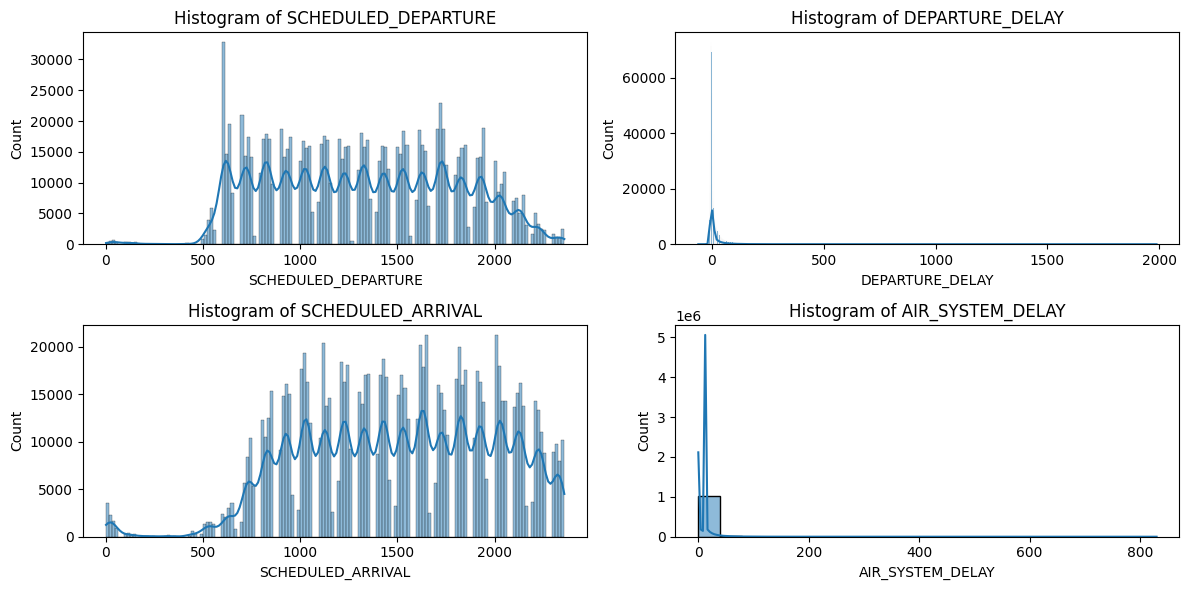

In [31]:
# Histograms and Density Plots
plt.figure(figsize=(12, 6))
for i, column in enumerate(['SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL', 'AIR_SYSTEM_DELAY']):
    plt.subplot(2, 2, i+1)
    sns.histplot(flights[column], kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

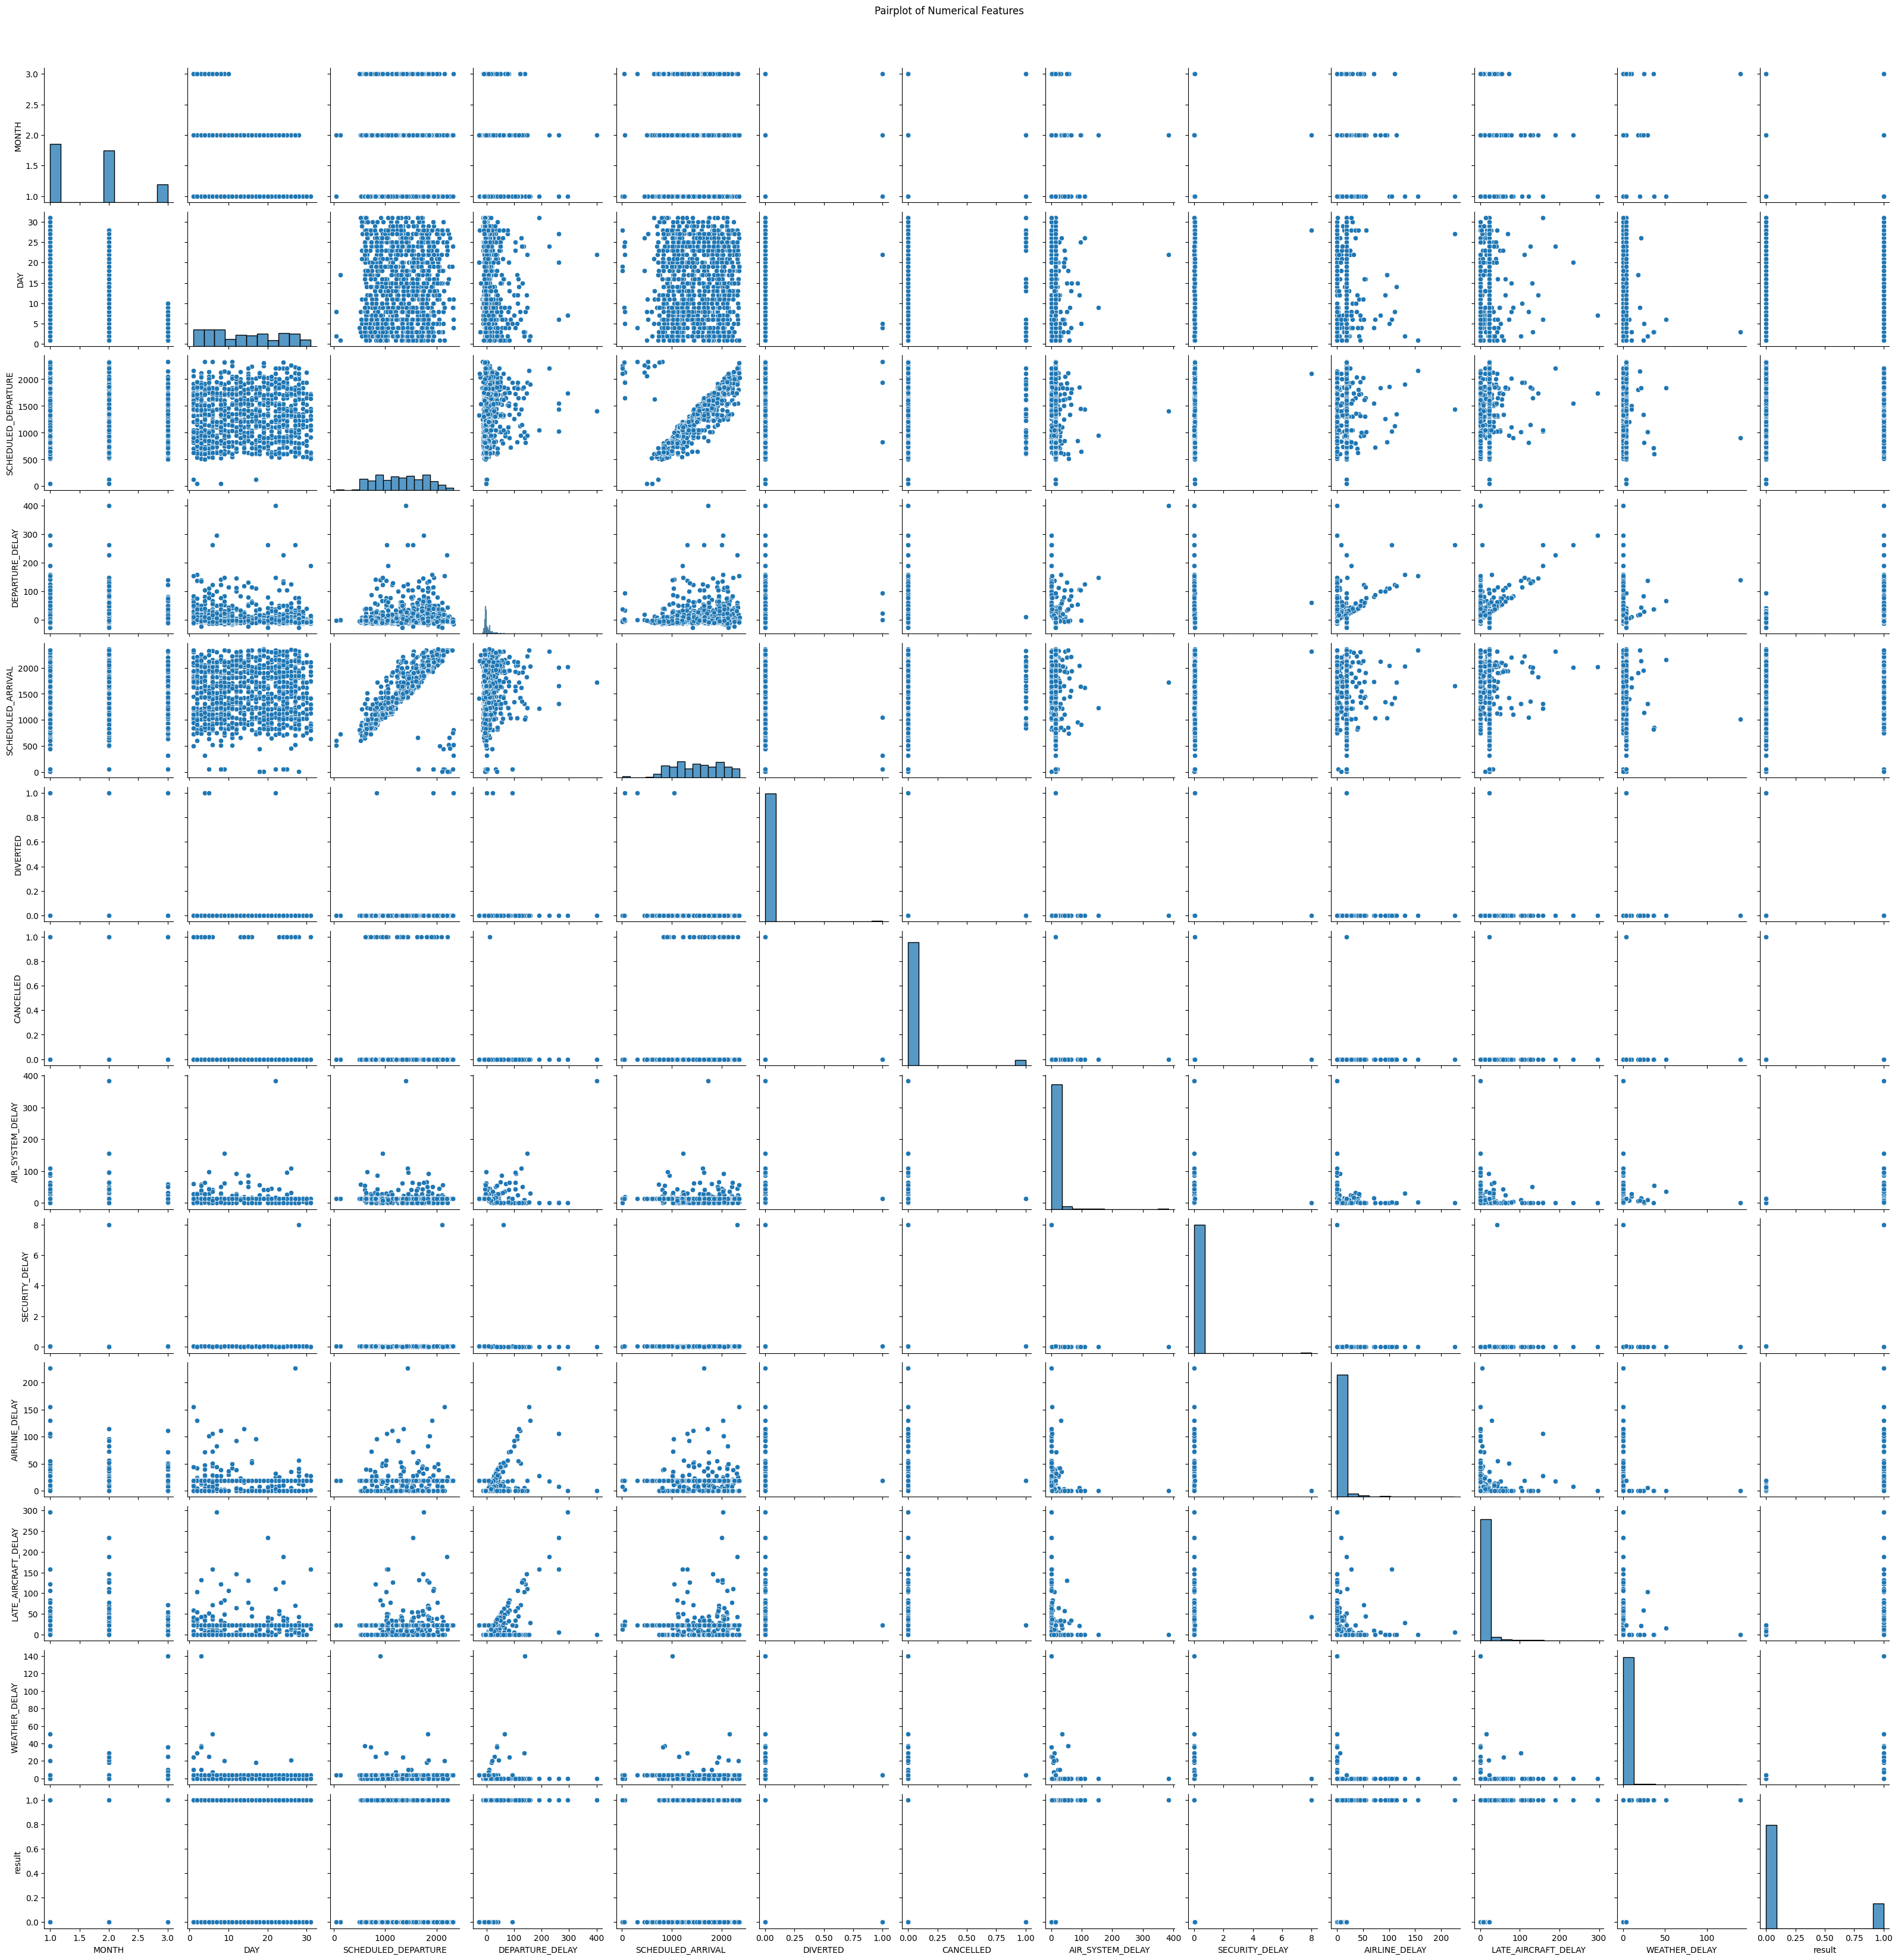

In [32]:
# Scatter Plots
sampled_flights = flights.sample(n=1000)  
plt.figure(figsize=(12, 6))
sns.pairplot(sampled_flights)
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

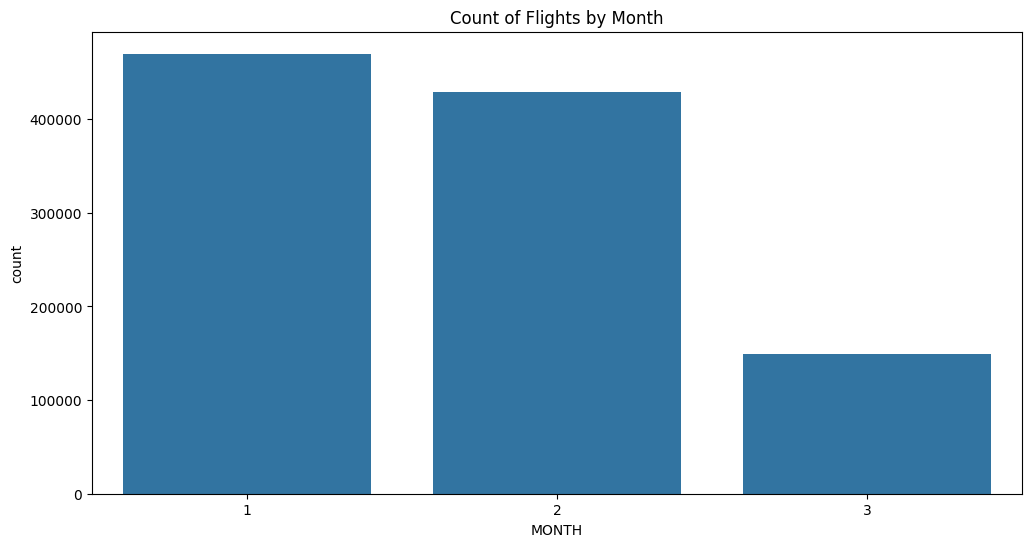

In [33]:
# Bar Plots
plt.figure(figsize=(12, 6))
sns.countplot(x='MONTH', data=flights)
plt.title('Count of Flights by Month')
plt.show()


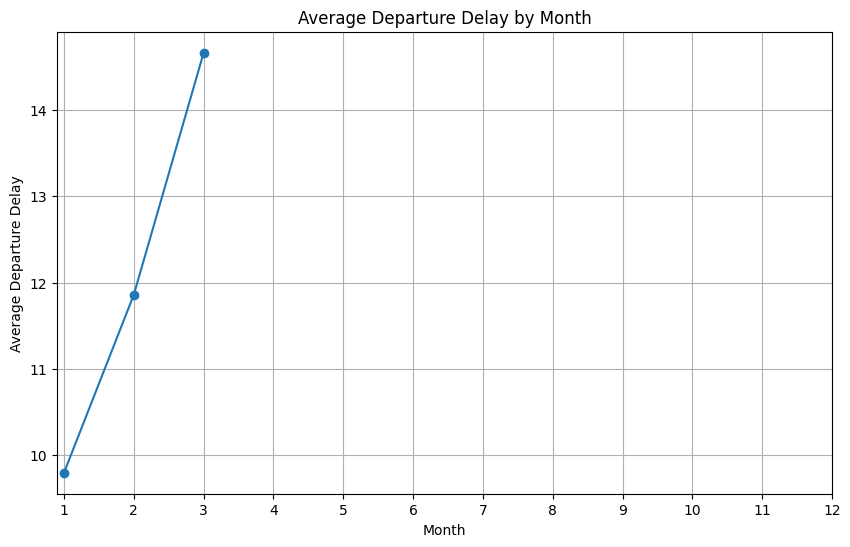

In [34]:
# Line Plot (if applicable)
# Example: Line plot of average departure delay by month
departure_delay_by_month = flights.groupby('MONTH')['DEPARTURE_DELAY'].mean()
plt.figure(figsize=(10, 6))
departure_delay_by_month.plot(marker='o')
plt.title('Average Departure Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Departure Delay')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()



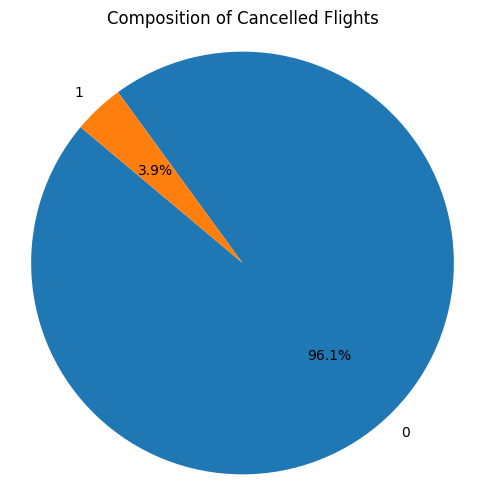

In [35]:
# Pie Chart (if applicable)
# Example: Composition of cancelled flights
cancelled_flights = flights['CANCELLED'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(cancelled_flights, labels=cancelled_flights.index, autopct='%1.1f%%', startangle=140)
plt.title('Composition of Cancelled Flights')
plt.axis('equal')
plt.show()

In [36]:
sc=StandardScaler()
X=flights.drop(columns='result')
Y=flights['result']
X=sc.fit_transform(X)

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [38]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [39]:
clf.score(X_test,Y_test)

0.9995279307631786

In [40]:
grid_param = {
'criterion': ['gini', 'entropy'],
'max_depth' : range(30,31,1),
'min_samples_leaf' : range(35,38,1),
'min_samples_split': range(35,38,1),
'splitter' : ['best', 'random']
}

In [41]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=clf,
    param_grid=grid_param,
    cv=5,
    n_jobs =-1)

In [42]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(30, 31),
                         'min_samples_leaf': range(35, 38),
                         'min_samples_split': range(35, 38),
                         'splitter': ['best', 'random']})

In [43]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 35, 'min_samples_split': 35, 'splitter': 'best'}


In [44]:
grid_search.best_score_

0.9990773192189399

In [45]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =30, min_samples_leaf= 35, min_samples_split= 35, splitter ='best')
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=35,
                       min_samples_split=35)

In [46]:
clf.score(X_test,Y_test)

0.9992513649476671

In [76]:
import pickle
filename = 'finalized_model.pickle'
pickle.dump(clf, open(filename, 'wb'))

In [77]:
loaded_model = pickle.load(open(filename, 'rb'))
prediction=loaded_model.predict([[1,1,5,-11,430,0,0,13,0,18,22,3]])
print(prediction)

[0]


In [78]:
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [79]:
loaded_model = pickle.load(open(filename, 'rb'))
prediction=loaded_model.predict([[1,1,5,-11,430,0,0,13,0,18,22,3]])
print(prediction)

[0]


## PCA

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [52]:
X=pd.read_csv('flights1.csv',low_memory=True)
X.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

In [54]:
X['AIRLINE'] = lc.fit_transform(X['AIRLINE'])
X['TAIL_NUMBER'] = lc.fit_transform(X['TAIL_NUMBER'])
X['ORIGIN_AIRPORT'] = lc.fit_transform(X['ORIGIN_AIRPORT'])
X['DESTINATION_AIRPORT'] = lc.fit_transform(X['DESTINATION_AIRPORT'])
X['CANCELLATION_REASON'] = lc.fit_transform(X['CANCELLATION_REASON'])

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1048575 non-null  int64  
 1   MONTH                1048575 non-null  int64  
 2   DAY                  1048575 non-null  int64  
 3   DAY_OF_WEEK          1048575 non-null  int64  
 4   AIRLINE              1048575 non-null  int32  
 5   FLIGHT_NUMBER        1048575 non-null  int64  
 6   TAIL_NUMBER          1048575 non-null  int32  
 7   ORIGIN_AIRPORT       1048575 non-null  int32  
 8   DESTINATION_AIRPORT  1048575 non-null  int32  
 9   SCHEDULED_DEPARTURE  1048575 non-null  int64  
 10  DEPARTURE_TIME       1009060 non-null  float64
 11  DEPARTURE_DELAY      1009060 non-null  float64
 12  TAXI_OUT             1008346 non-null  float64
 13  WHEELS_OFF           1008346 non-null  float64
 14  SCHEDULED_TIME       1048573 non-null  float64
 15

In [56]:
X.isnull().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER                 0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          39515
DEPARTURE_DELAY         39515
TAXI_OUT                40229
WHEELS_OFF              40229
SCHEDULED_TIME              2
ELAPSED_TIME            43071
AIR_TIME                43071
DISTANCE                    0
WHEELS_ON               41296
TAXI_IN                 41296
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            41296
ARRIVAL_DELAY           43071
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON         0
AIR_SYSTEM_DELAY       820047
SECURITY_DELAY         820047
AIRLINE_DELAY          820047
LATE_AIRCRAFT_DELAY    820047
WEATHER_DELAY          820047
dtype: int64

In [57]:
import pandas as pd
columns_to_fill = ['DEPARTURE_TIME','DEPARTURE_DELAY', 'TAXI_OUT','WHEELS_OFF','ELAPSED_TIME','WHEELS_ON','TAXI_IN','AIR_TIME','ARRIVAL_TIME', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY',
                    'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY','SCHEDULED_TIME']

for column in columns_to_fill:
    X[column].fillna(X[column].mean(), inplace=True)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7256\1558458797.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[column].fillna(X[column].mean(), inplace=True)


In [58]:
X.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

In [59]:
import pandas as pd
#df = pd.DataFrame(X)

In [60]:
correlation_matrix = X.corr()
print(correlation_matrix)

                     YEAR     MONTH       DAY  DAY_OF_WEEK   AIRLINE  \
YEAR                  NaN       NaN       NaN          NaN       NaN   
MONTH                 NaN  1.000000 -0.347968    -0.031341 -0.003418   
DAY                   NaN -0.347968  1.000000     0.015988  0.000824   
DAY_OF_WEEK           NaN -0.031341  0.015988     1.000000 -0.008229   
AIRLINE               NaN -0.003418  0.000824    -0.008229  1.000000   
FLIGHT_NUMBER         NaN -0.008263  0.009255     0.014241  0.039358   
TAIL_NUMBER           NaN  0.003492  0.004118    -0.006663  0.121801   
ORIGIN_AIRPORT        NaN -0.000603 -0.001407     0.005691  0.088464   
DESTINATION_AIRPORT   NaN -0.001040 -0.001124     0.005779  0.088685   
SCHEDULED_DEPARTURE   NaN -0.003844 -0.007891     0.020229  0.000517   
DEPARTURE_TIME        NaN -0.000587 -0.013200     0.013953  0.004882   
DEPARTURE_DELAY       NaN  0.042840 -0.071168    -0.001191 -0.002784   
TAXI_OUT              NaN  0.009953 -0.008096    -0.020333 -0.13

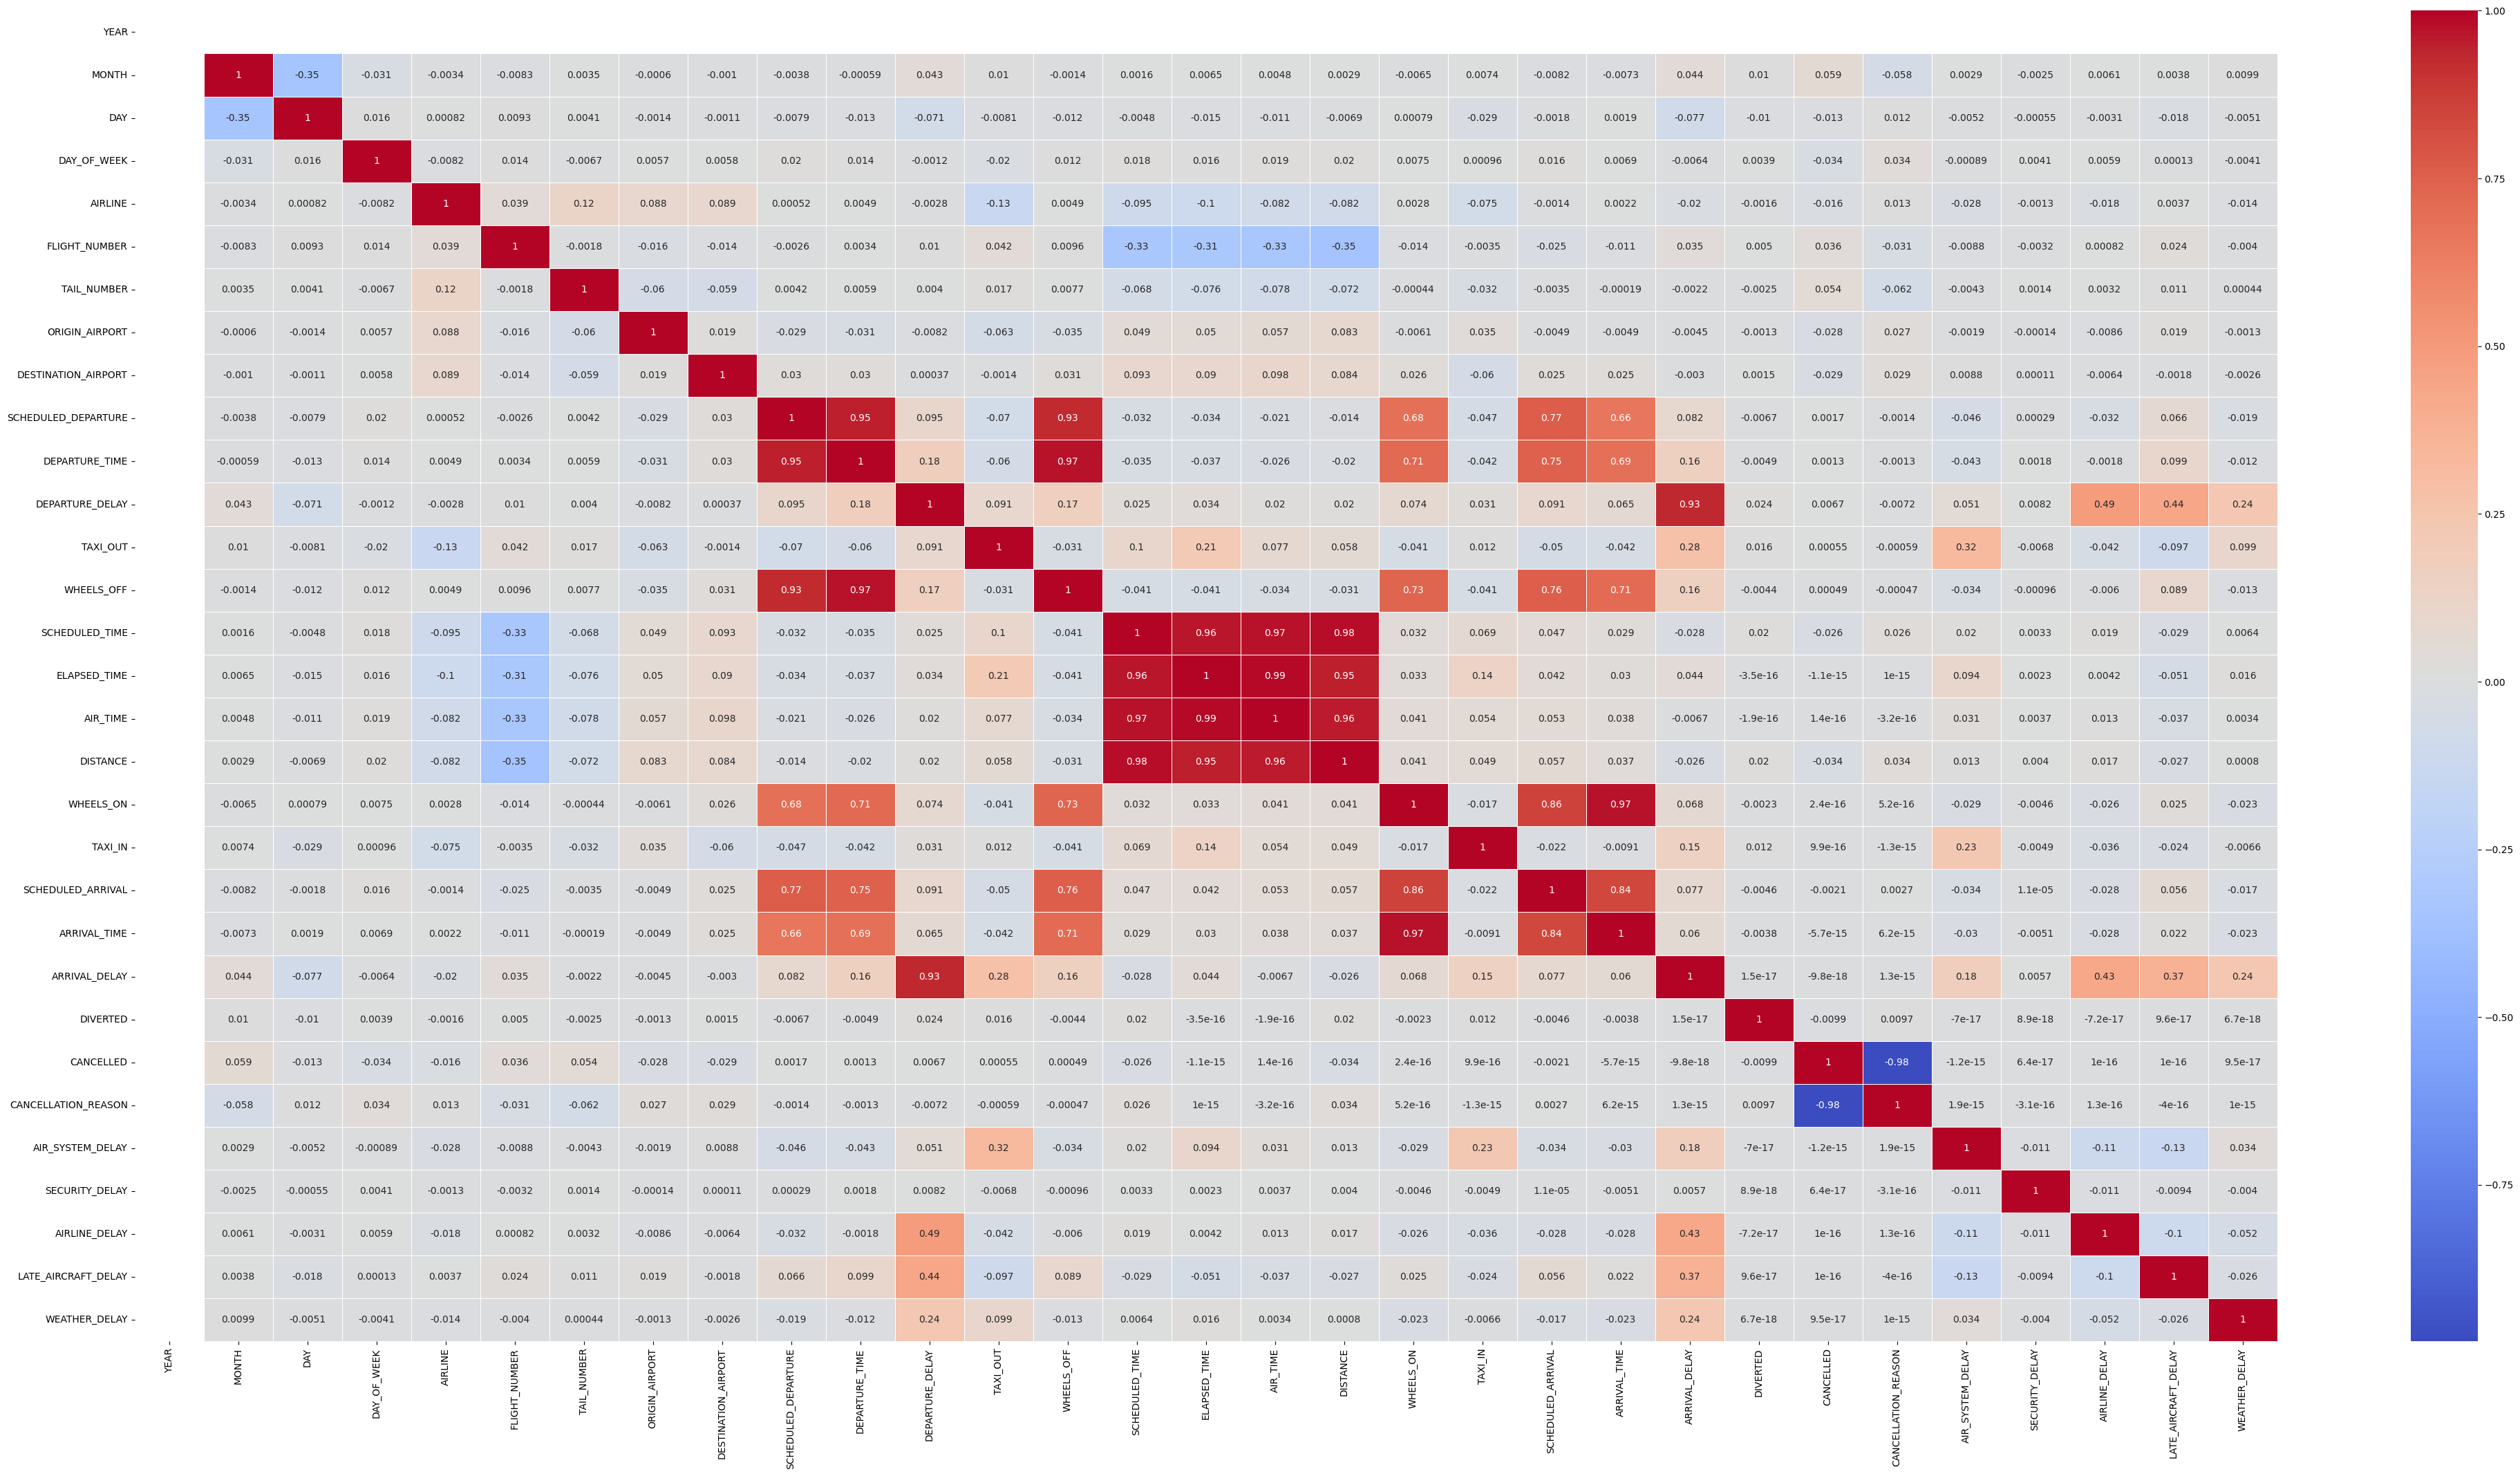

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [62]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [63]:
pca = PCA()

In [64]:
pca.fit(X_scaled)

PCA()

In [65]:
import numpy as np
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print(cumulative_explained_variance)
print(explained_variance_ratio)

[0.16862177 0.30601302 0.38967155 0.4565245  0.50727642 0.55182054
 0.58972846 0.62702452 0.66313025 0.69835315 0.73189214 0.76525755
 0.79831233 0.83093734 0.8607036  0.88867183 0.91449433 0.93716699
 0.95879834 0.97801534 0.98613666 0.99200627 0.9942085  0.99622666
 0.99736369 0.99832062 0.99904458 0.99959386 0.99999741 1.
 1.        ]
[1.68621772e-01 1.37391245e-01 8.36585294e-02 6.68529559e-02
 5.07519197e-02 4.45441183e-02 3.79079204e-02 3.72960576e-02
 3.61057289e-02 3.52228979e-02 3.35389953e-02 3.33654067e-02
 3.30547788e-02 3.26250171e-02 2.97662589e-02 2.79682243e-02
 2.58225072e-02 2.26726551e-02 2.16313511e-02 1.92170023e-02
 8.12131415e-03 5.86961263e-03 2.20223576e-03 2.01816019e-03
 1.13702862e-03 9.56927959e-04 7.23956574e-04 5.49286720e-04
 4.03545339e-04 2.59008766e-06 8.80788218e-34]


In [66]:
n_components_to_retain = np.argmax(cumulative_explained_variance >= 0.95) + 1
n_components_to_retain 

19

In [67]:
pca = PCA(n_components=n_components_to_retain)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-4.06439631,  2.06842997, -0.11635101, ..., -0.21849641,
        -1.24560239, -1.61090704],
       [-5.26601159,  4.37527056, -0.17890927, ..., -0.80526793,
         0.93862441, -1.80854782],
       [-5.09557767,  4.59627566,  0.14807957, ...,  1.41541829,
         1.048516  , -1.83651975],
       ...,
       [-0.56362873,  3.29962612, -0.11134082, ..., -0.86644374,
         0.90123142,  0.88197629],
       [-1.58008472,  0.17968988, -0.37918568, ..., -0.2912363 ,
         0.05934723,  1.03233423],
       [-0.58366701, -1.24601981,  0.55334351, ...,  0.21700026,
         0.35625555,  0.71505275]])

## LOGISTIC REGRESSION

In [68]:
result=[]
for row in X['ARRIVAL_DELAY']:
    if row > 15:
        result.append(1)
    else:
        result.append(0) 

In [69]:
X['result']=result

In [70]:
y=X['result']

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [72]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [73]:
model.fit(X_train, y_train)

LogisticRegression()

In [74]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9166154066232745
